In [1]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\mohd zubair\Downloads\Sample - Superstore.csv.zip",
    compression="zip",
    encoding="latin1"
)

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Missing values check
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Duplicate rows check
df.duplicated().sum()

np.int64(0)

In [7]:
# Date convert
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Ship Date"]=pd.to_datetime(df["Ship Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
print("Total Sales:", df["Sales"].sum())
print("Total Profit:", df["Profit"].sum())
print("Total Quantity:", df["Quantity"].sum())

Total Sales: 2297200.8603
Total Profit: 286397.0217
Total Quantity: 37873


In [9]:
#Category-wise Sales
df.groupby("Category")["Sales"].sum()

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [10]:
#Category-wise Profit
df.groupby("Category")["Profit"].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

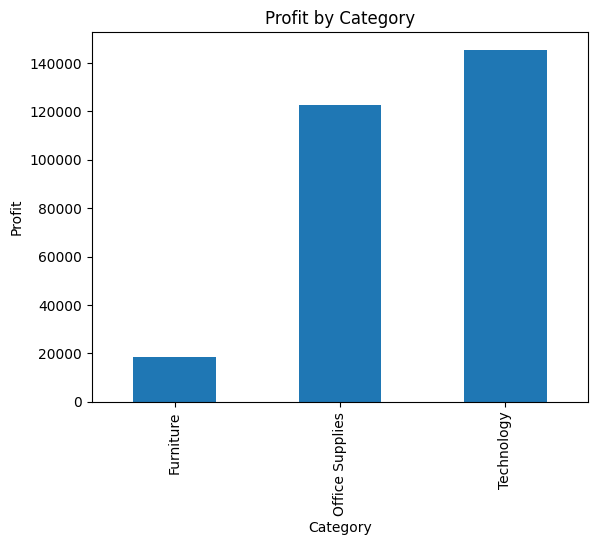

In [11]:
import matplotlib.pyplot as plt

df.groupby("Category")["Profit"].sum().plot(kind="bar")
plt.title("Profit by Category")
plt.ylabel("Profit")
plt.xlabel("Category")
plt.show()

In [12]:
# Sales vs Profit comparison
df.groupby("Category")[["Sales","Profit"]].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


In [13]:
# Sub-Category wise Sales
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False)

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

In [14]:
# Sub-Category wise Profit
df.groupby("Sub-Category")["Profit"].sum().sort_values()

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

In [15]:
# Region wise Sales
df.groupby("Region")["Sales"].sum().sort_values(ascending=False)

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [16]:
# Segment wise Profit
df.groupby("Segment")["Profit"].sum().sort_values(ascending=False)

Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64

In [17]:
# Top 10 Products by Sales
df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

In [21]:
# Time Analysis 
 # Monthly Sales Trend
df["Month"] = df["Order Date"].dt.month
df.groupby("Month")["Sales"].sum()

Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

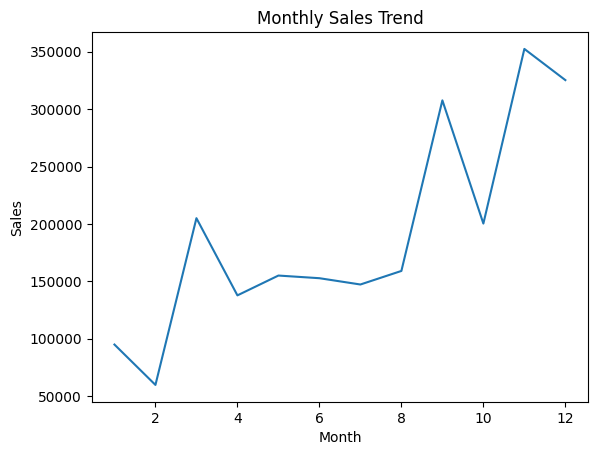

In [23]:
# Monthly Sales graph
import matplotlib.pyplot as plt
df.groupby("Month")["Sales"].sum().plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")plt.show()

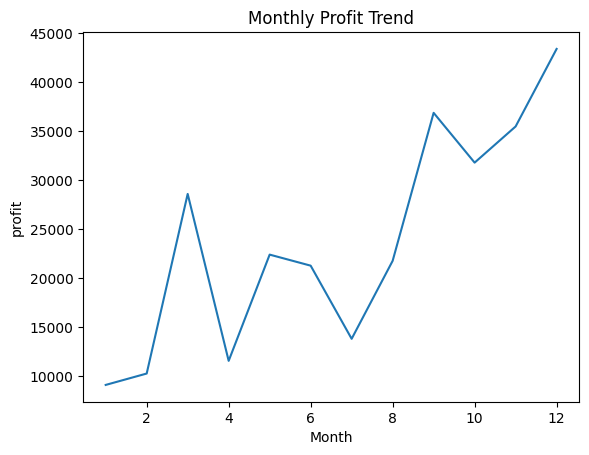

In [29]:
# Monthly Profit graph
Monthly_Profit = df.groupby("Month")["Profit"].sum()
monthly_profit.plot()
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("profit")
plt.show()Q

In [30]:
# Loss-making Category check
df.groupby("Category")["Profit"].sum()

Category
Furniture           18451.2728
Office Supplies    122490.8008
Technology         145454.9481
Name: Profit, dtype: float64

In [31]:
# Top 10 profitable products
df.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

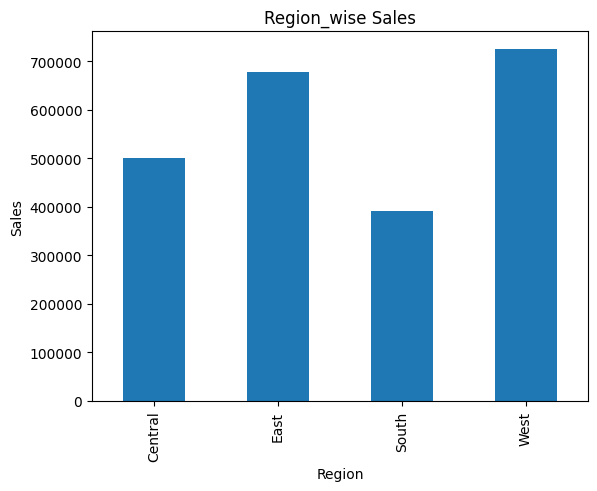

In [38]:
# Region-wise Sales graph
df.groupby("Region")["Sales"].sum().plot(kind="bar")
plt.title("Region_wise Sales")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

In [34]:
df.to_csv("Cleaned_Superstore.csv",index)